In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
teams = pd.read_csv('data/Teams.csv')
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

In [4]:
teams['teamID'].nunique()

149

In [5]:
modern = teams[teams['yearID'] > 1876]
pre_modern = teams[teams['yearID'] < 1876]

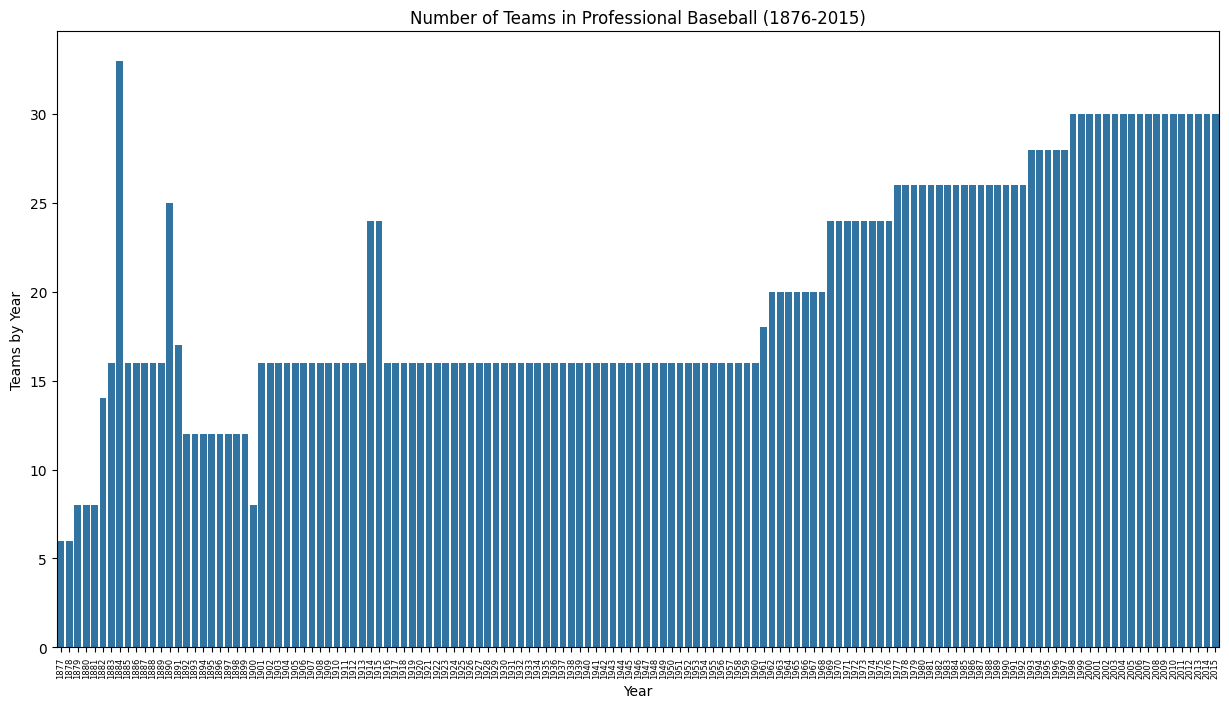

In [6]:
plt.figure(figsize=(15,8))
teams_by_year = modern['yearID'].value_counts()
sns.barplot(x=teams_by_year.index, y=teams_by_year.values)
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('Year')
plt.ylabel('Teams by Year')
plt.title('Number of Teams in Professional Baseball (1876-2015)')
plt.show()

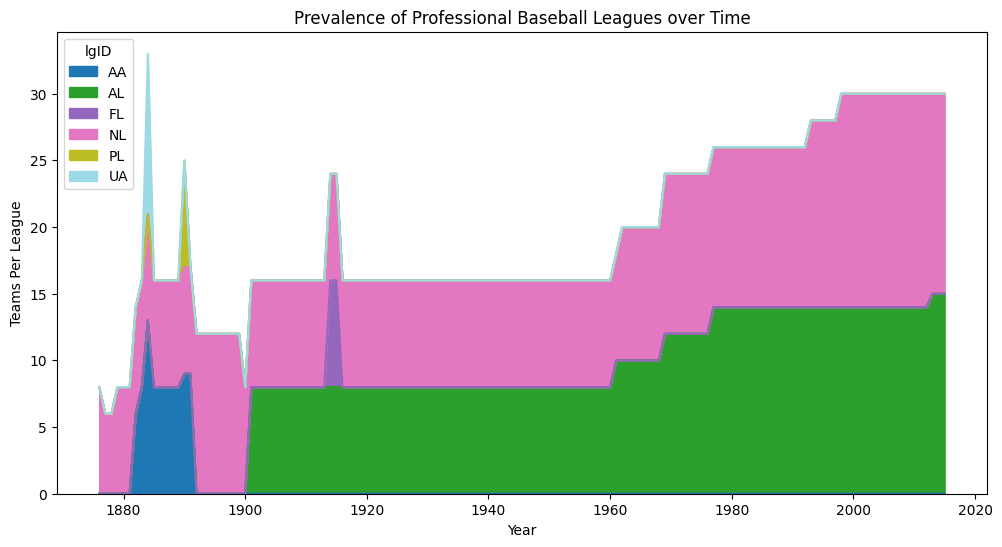

In [7]:
leagues_over_time = teams.groupby(['yearID', 'lgID']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
leagues_over_time.plot(kind='area', stacked=True, cmap='tab20', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Teams Per League')
plt.title('Prevalence of Professional Baseball Leagues over Time')
plt.show()

# Which team has the highest win-loss ratio of all time?

In [8]:
performance_by_year = teams.groupby(['teamID', 'yearID'])[['G', 'W', 'L']].sum()
performance_by_year['w/l'] = performance_by_year['W'] / (performance_by_year['W'] + performance_by_year['L'])
performance_by_year

G   W   L       w/l
teamID yearID                       
ALT    1884     25   6  19  0.240000
ANA    1997    162  84  78  0.518519
       1998    162  85  77  0.524691
       1999    162  70  92  0.432099
       2000    162  82  80  0.506173
...            ...  ..  ..       ...
WS8    1887    126  46  76  0.377049
       1888    136  48  86  0.358209
       1889    127  41  83  0.330645
WS9    1891    139  44  91  0.325926
WSU    1884    114  47  65  0.419643

[2805 rows x 4 columns]

What was each team's best year?

In [9]:
best_years = performance_by_year.groupby('teamID')['w/l'].idxmax()
best_df = performance_by_year.loc[best_years, ['w/l']]
best_df.reset_index('yearID', inplace=True)
best_df

,yearID,w/l
teamID,,
ALT,1884,0.240000
ANA,2002,0.611111
ARI,1999,0.617284
ATL,1998,0.654321
BAL,1969,0.672840
...,...,...
WS6,1875,0.178571
WS7,1884,0.190476
WS8,1887,0.377049


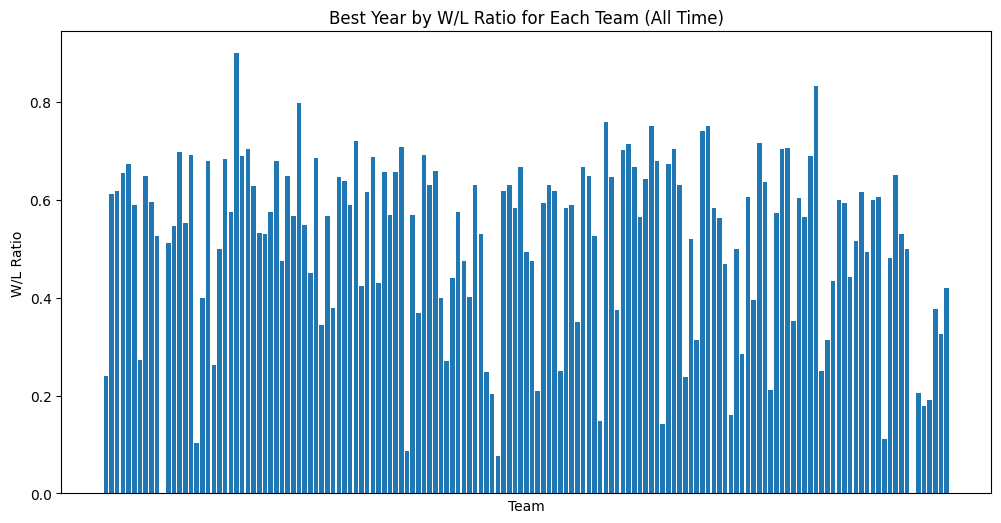

In [10]:
plt.figure(figsize=(12,6))
plt.bar(best_df.index, best_df['w/l'])
plt.xticks([])
plt.title('Best Year by W/L Ratio for Each Team (All Time)')
plt.xlabel('Team')
plt.ylabel('W/L Ratio')
plt.show()

There are no clear outliers in this data

In [11]:
overall_performance = teams.groupby('teamID')[['G', 'W', 'L']].sum()
overall_performance['w/l'] = overall_performance['W'] / (overall_performance['W'] + overall_performance['L'])
overall_performance

,G,W,L,w/l
teamID,,,,
ALT,25,6,19,0.240000
ANA,1296,664,632,0.512346
ARI,2916,1434,1482,0.491770
ATL,7965,4106,3851,0.516024
BAL,9844,5041,4791,0.512714
...,...,...,...,...
WS6,28,5,23,0.178571
WS7,63,12,51,0.190476
WS8,514,163,337,0.326000


# What factors contribute most to a team's success?

In [12]:
success_df = teams[['yearID', 'lgID', 'divID', 'teamID', 'Rank', 'G', 'Ghome', 'W', 'L', 'R', 'RA', 'H', 'AB', 'ERA', 'FP']]
success_df.head()

,yearID,lgID,divID,teamID,Rank,G,Ghome,W,L,R,RA,H,AB,ERA,FP
0,1871,NaN,NaN,BS1,3,31,NaN,20,10,401,303,426,1372,3.55,0.83
1,1871,NaN,NaN,CH1,2,28,NaN,19,9,302,241,323,1196,2.76,0.82
2,1871,NaN,NaN,CL1,8,29,NaN,10,19,249,341,328,1186,4.11,0.81
3,1871,NaN,NaN,FW1,7,19,NaN,7,12,137,243,178,746,5.17,0.80
4,1871,NaN,NaN,NY2,5,33,NaN,16,17,302,313,403,1404,3.72,0.83


In [13]:
summary_stats = success_df.groupby(['yearID', 'teamID']).agg({
    'G': 'sum',
    'R': 'sum',
    'RA': 'sum',
    'H': 'sum',
    'AB': 'sum',
    'ERA': 'mean',
    'FP': 'mean',
    'Rank': 'sum',
})

summary_stats

G    R   RA     H    AB   ERA     FP  Rank
yearID teamID                                              
1871   BS1      31  401  303   426  1372  3.55  0.830     3
       CH1      28  302  241   323  1196  2.76  0.820     2
       CL1      29  249  341   328  1186  4.11  0.810     8
       FW1      19  137  243   178   746  5.17  0.800     7
       NY2      33  302  313   403  1404  3.72  0.830     5
...            ...  ...  ...   ...   ...   ...    ...   ...
2015   SLN     162  647  525  1386  5484  2.94  0.984     1
       TBA     162  644  642  1383  5485  3.74  0.984     4
       TEX     162  751  733  1419  5511  4.24  0.981     1
       TOR     162  891  670  1480  5509  3.80  0.985     1
       WAS     162  703  635  1363  5428  3.62  0.985     2

[2805 rows x 8 columns]

### Runs

In [14]:
runs = summary_stats['R'].describe()
runs

count    2805.000000
mean      681.945811
std       135.738244
min        24.000000
25%       613.000000
50%       690.000000
75%       763.000000
max      1220.000000
Name: R, dtype: float64

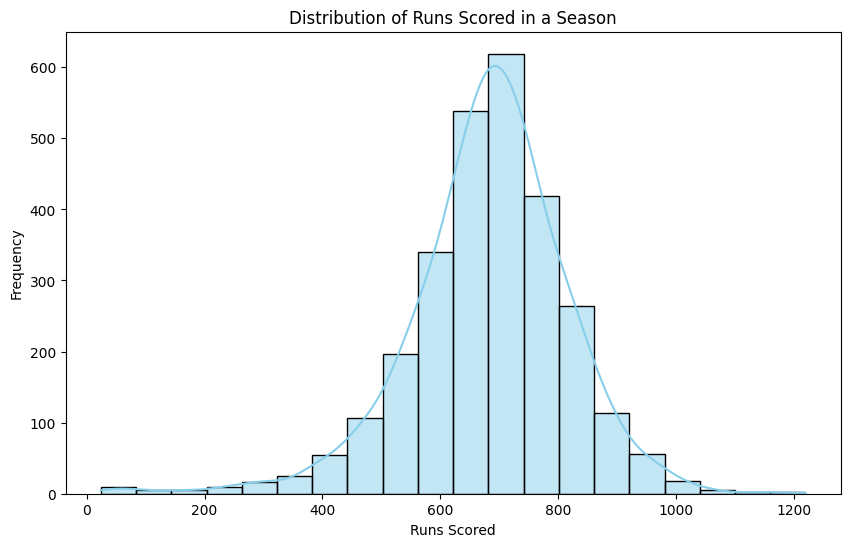

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(summary_stats['R'], bins=20, kde=True, color='skyblue')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Scored in a Season')
plt.show()

In [16]:
summary_stats['R'].mean()

681.9458110516935

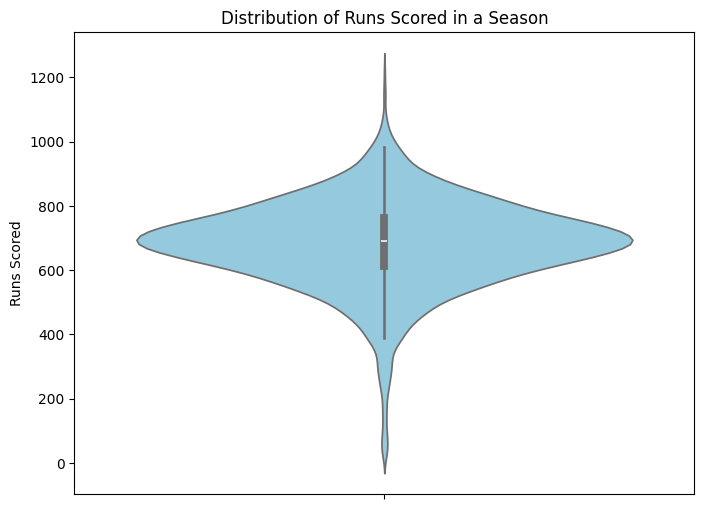

In [17]:
plt.figure(figsize=(8,6))
sns.violinplot(y='R', data=summary_stats, color='skyblue')
plt.ylabel('Runs Scored')
plt.title('Distribution of Runs Scored in a Season')
plt.show()

### Batting Average

In [18]:
summary_stats['H/AB'] = summary_stats['H'] / summary_stats['AB']
summary_stats['H/AB'].describe()

count    2805.000000
mean        0.261449
std         0.017900
min         0.156398
25%         0.250092
50%         0.260746
75%         0.271554
max         0.348701
Name: H/AB, dtype: float64

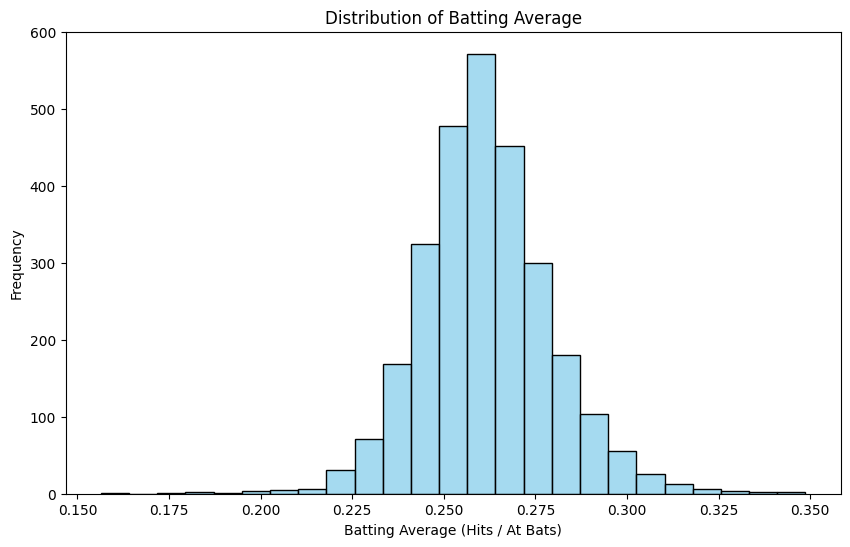

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(summary_stats['H/AB'], bins=25, kde=False, color='skyblue')
plt.xlabel('Batting Average (Hits / At Bats)')
plt.ylabel('Frequency')
plt.title('Distribution of Batting Average')
plt.show()

### Runs Against

In [20]:
summary_stats['RA'].describe()

count    2805.000000
mean      681.945811
std       134.914999
min        34.000000
25%       609.000000
50%       688.000000
75%       764.000000
max      1252.000000
Name: RA, dtype: float64

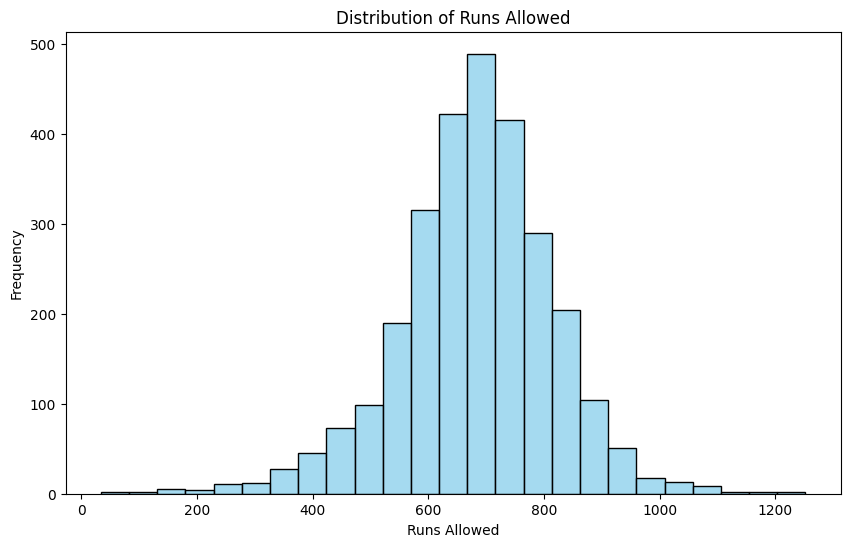

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(summary_stats['RA'], bins=25, kde=False, color='skyblue')
plt.xlabel('Runs Allowed')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Allowed')
plt.show()

### ERA

In [22]:
summary_stats['ERA'].describe()

count    2805.00000
mean        3.81497
std         0.76257
min         1.22000
25%         3.34000
50%         3.82000
75%         4.30000
max         8.00000
Name: ERA, dtype: float64

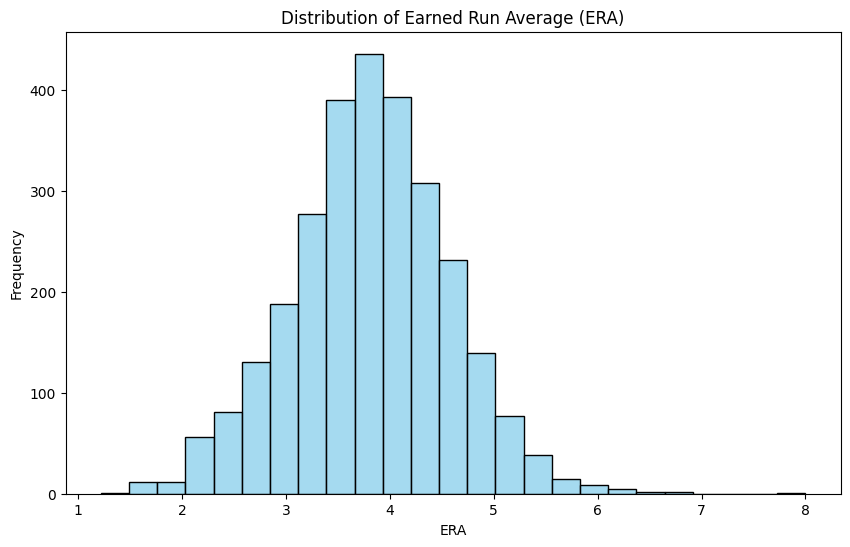

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(summary_stats['ERA'], bins=25, kde=False, color='skyblue')
plt.xlabel('ERA')
plt.ylabel('Frequency')
plt.title('Distribution of Earned Run Average (ERA)')
plt.show()

### Fielding Percentage

In [24]:
summary_stats['FP'].describe() * 100

count    280500.000000
mean         96.151872
std           3.022372
min          76.000000
25%          96.000000
50%          97.000000
75%          98.000000
max          99.100000
Name: FP, dtype: float64

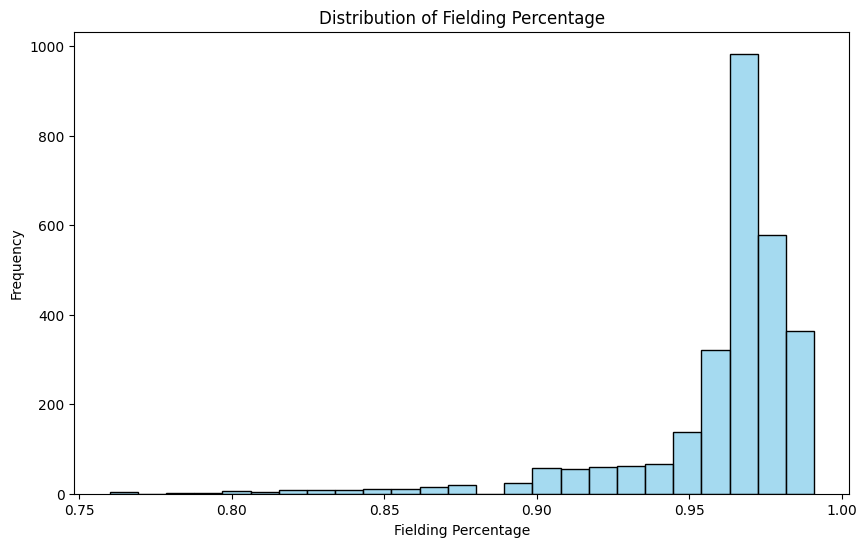

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(summary_stats['FP'], bins=25, kde=False, color='skyblue')
plt.xlabel('Fielding Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Fielding Percentage')
plt.show()

### Correlation Analysis

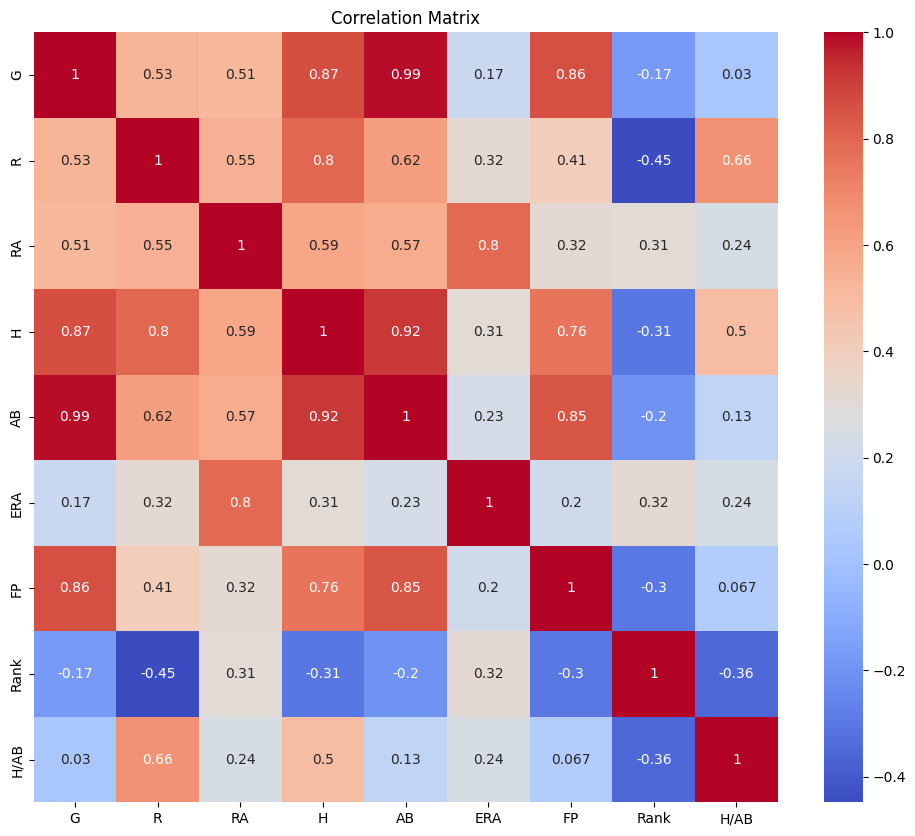

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(summary_stats.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Matthew\AppData\Local\Temp\ipykernel_22812\2089695921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rank_corr.index, y=rank_corr.values, palette='coolwarm')


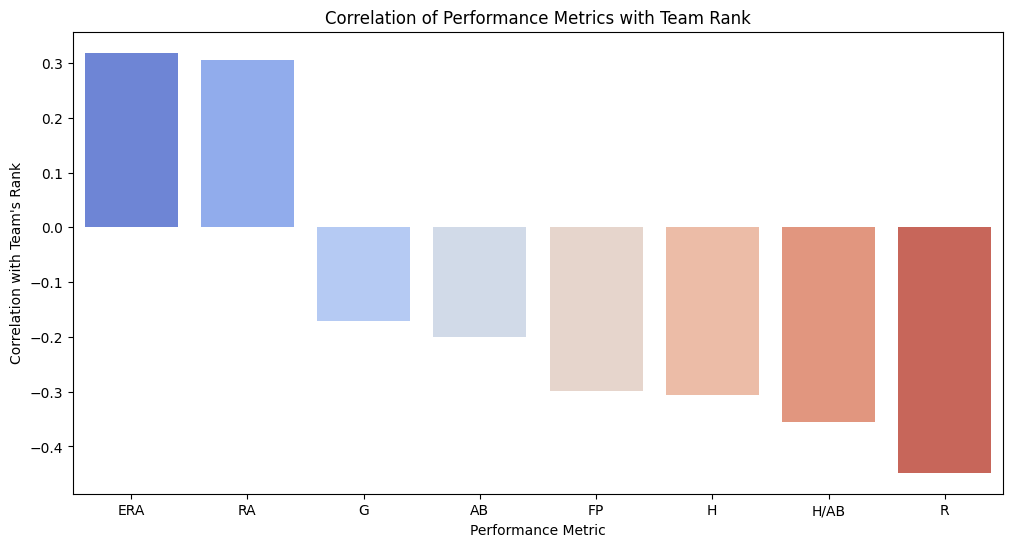

In [27]:
rank_corr = summary_stats.corr()['Rank'].sort_values(ascending=False)
rank_corr.drop('Rank', inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x=rank_corr.index, y=rank_corr.values, palette='coolwarm')
plt.xlabel('Performance Metric')
plt.ylabel('Correlation with Team\'s Rank')
plt.title('Correlation of Performance Metrics with Team Rank')
plt.show()

In [28]:
rank_corr

ERA     0.318717
RA      0.305040
G      -0.171295
AB     -0.199481
FP     -0.298955
H      -0.306493
H/AB   -0.355229
R      -0.447966
Name: Rank, dtype: float64

Based on the correlation values, we see that a lower ERA and less Runs Allowed are positively correlated with a higher Rank. From this, we can infer that having strong pitching and overall defense are the factors that contribute most to a team's success. 

# How does team performance vary across the different leagues and divisons?

In [29]:
performance_stats = teams.groupby(['lgID', 'divID', 'yearID'])
performance = performance_stats.agg({
    'W': 'sum',
    'L': 'sum',
    'G': 'sum',
    'R': 'sum',
    'RA': 'sum',
    'H': 'sum',
    'AB': 'sum',
    'HR': 'sum',
    'BB': 'sum',
    'SO': 'sum',
    'FP': 'mean',
    'ERA': 'mean',
    'BPF': 'mean',
    'PPF': 'mean',
})

performance['W/L'] = performance['W'] / performance['G'] 
performance['BA'] = performance['H'] / performance['AB']

In [30]:
performance

W    L    G     R    RA     H     AB   HR    BB      SO  \
lgID divID yearID                                                              
AL   C     1994    303  266  569  3027  2866  5486  19805  590  2031  3210.0   
           1995    359  361  721  3667  3692  6880  24996  720  2566  4098.0   
           1996    417  391  808  4367  4148  7939  28202  832  3101  4658.0   
           1997    379  427  806  3847  4071  7502  27724  803  2736  5005.0   
           1998    376  433  810  3881  4290  7498  28052  810  2617  4946.0   
...                ...  ...  ...   ...   ...   ...    ...  ...   ...     ...   
NL   W     2011    406  403  809  3273  3237  6792  27304  664  2533  5979.0   
           2012    401  409  810  3498  3534  7145  27457  671  2492  5970.0   
           2013    399  411  810  3287  3428  7221  27835  680  2358  5879.0   
           2014    389  421  810  3288  3368  7012  27541  679  2209  6231.0   
           2015    397  413  810  3470  3510  7129  27628  811  2324  6339.0   

                       FP    ERA    BPF    PPF       W/L        BA  
lgID divID yearID                                                   
AL   C     1994    0.9800  4.568  101.2  101.2  0.532513  0.277001  
           1995    0.9800  4.750  100.8  100.4  0.497920  0.275244  
           1996    0.9780  4.780   99.6   99.8  0.516089  0.281505  
           1997    0.9780  4.684  100.4  100.6  0.470223  0.270596  
           1998    0.9780  4.908  100.6  101.0  0.464198  0.267289  
...                   ...    ...    ...    ...       ...       ...  
NL   W     2011    0.9846  3.678  100.4  100.2  0.501854  0.248755  
           2012    0.9820  4.036  100.2  100.6  0.495062  0.260225  
           2013    0.9848  3.918   99.0   99.0  0.492593  0.259422  
           2014    0.9832  3.854   99.8   99.8  0.480247  0.254602  
           2015    0.9862  4.066  104.8  103.2  0.490123  0.258035  

[232 rows x 16 columns]

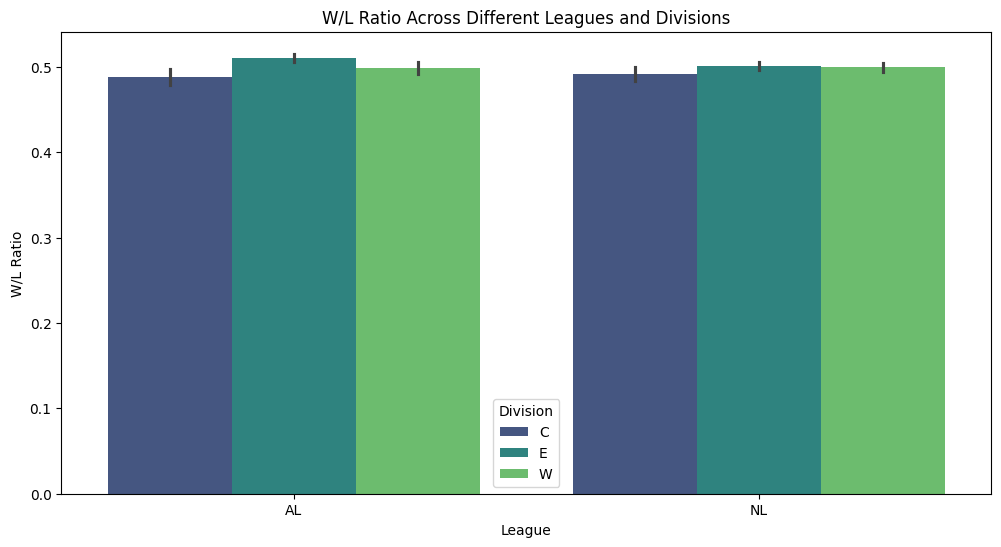

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='lgID', y='W/L', hue='divID', data=performance, palette='viridis')
plt.xlabel('League')
plt.ylabel('W/L Ratio')
plt.title('W/L Ratio Across Different Leagues and Divisions')
plt.legend(title='Division', loc='best')
plt.show()

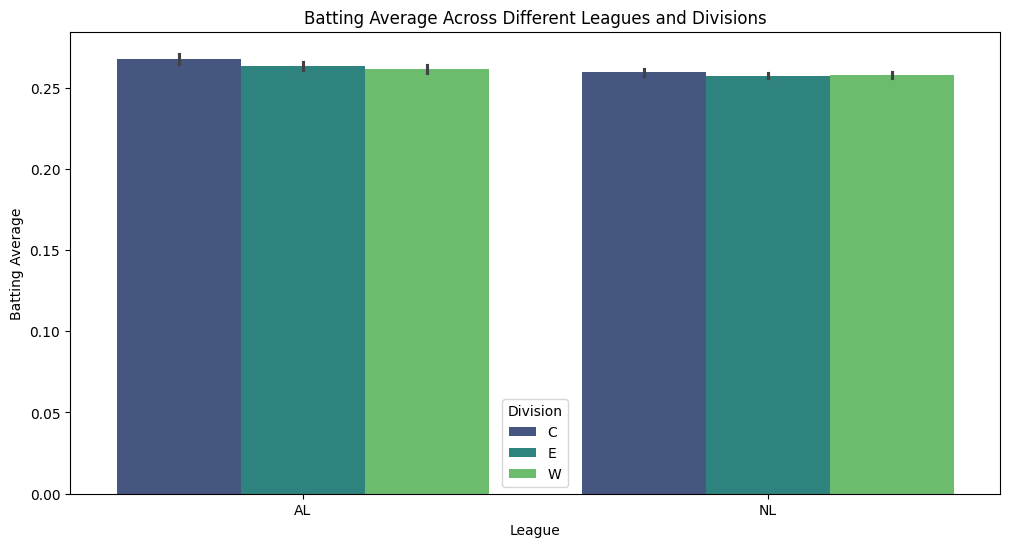

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x='lgID', y='BA', hue='divID', data=performance, palette='viridis')
plt.xlabel('League')
plt.ylabel('Batting Average')
plt.title('Batting Average Across Different Leagues and Divisions')
plt.legend(title='Division', loc='best')
plt.show()

No clear differences in these key metrics between leagues and divisions.

### What about over time?

In [33]:
perf_over_time = performance.reset_index()
perf_over_time

,lgID,divID,yearID,W,L,G,R,RA,H,AB,HR,BB,SO,FP,ERA,BPF,PPF,W/L,BA
0,AL,C,1994,303,266,569,3027,2866,5486,19805,590,2031,3210.0,0.9800,4.568,101.2,101.2,0.532513,0.277001
1,AL,C,1995,359,361,721,3667,3692,6880,24996,720,2566,4098.0,0.9800,4.750,100.8,100.4,0.497920,0.275244
2,AL,C,1996,417,391,808,4367,4148,7939,28202,832,3101,4658.0,0.9780,4.780,99.6,99.8,0.516089,0.281505
3,AL,C,1997,379,427,806,3847,4071,7502,27724,803,2736,5005.0,0.9780,4.684,100.4,100.6,0.470223,0.270596
4,AL,C,1998,376,433,810,3881,4290,7498,28052,810,2617,4946.0,0.9780,4.908,100.6,101.0,0.464198,0.267289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,NL,W,2011,406,403,809,3273,3237,6792,27304,664,2533,5979.0,0.9846,3.678,100.4,100.2,0.501854,0.248755
228,NL,W,2012,401,409,810,3498,3534,7145,27457,671,2492,5970.0,0.9820,4.036,100.2,100.6,0.495062,0.260225
229,NL,W,2013,399,411,810,3287,3428,7221,27835,680,2358,5879.0,0.9848,3.918,99.0,99.0,0.492593,0.259422
230,NL,W,2014,389,421,810,3288,3368,7012,27541,679,2209,6231.0,0.9832,3.854,99.8,99.8,0.480247,0.254602


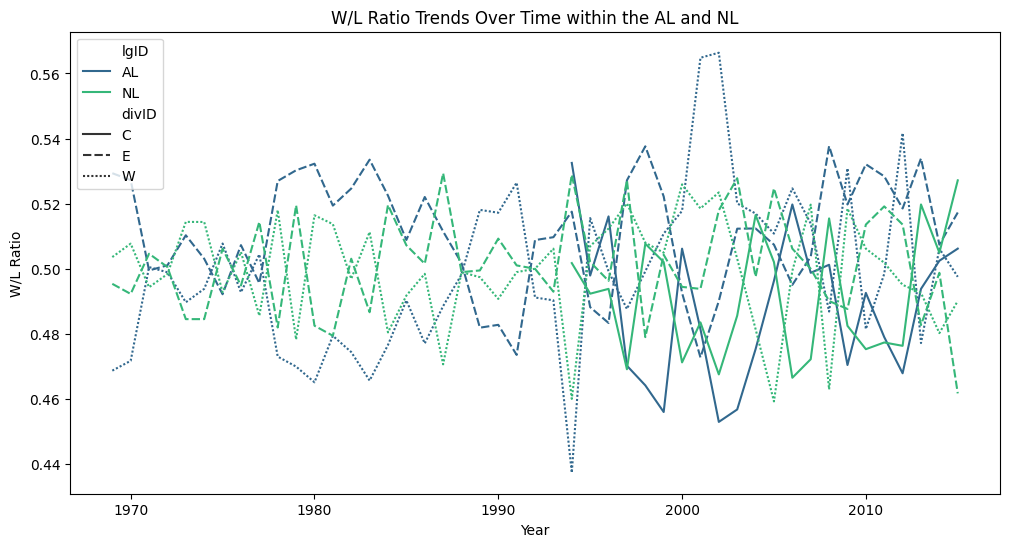

In [34]:
plt.figure(figsize=(12,6))
sns.lineplot(x='yearID', y='W/L', hue='lgID', style='divID', data=perf_over_time, palette='viridis')
plt.xlabel('Year')
plt.ylabel('W/L Ratio')
plt.title('W/L Ratio Trends Over Time within the AL and NL')
plt.show()

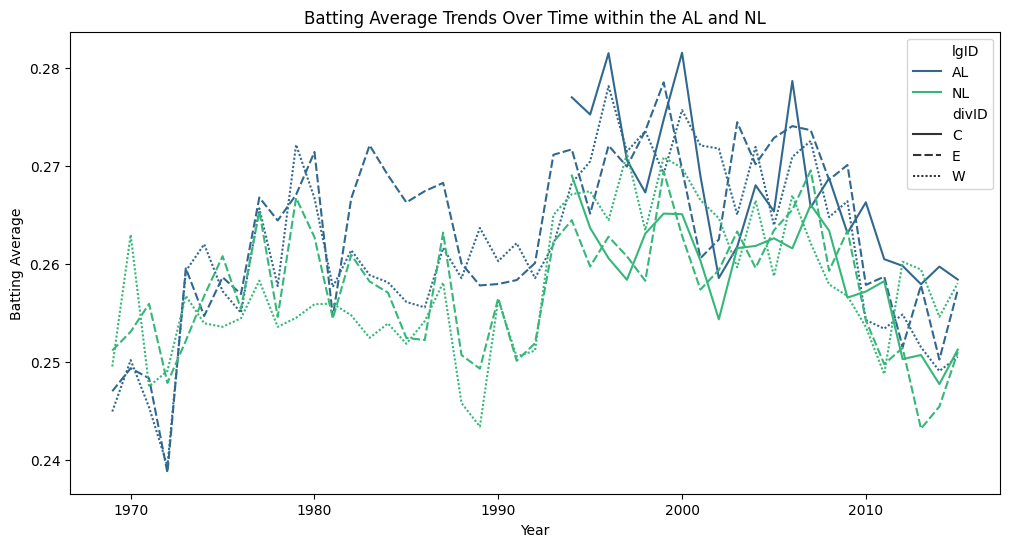

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x='yearID', y='BA', hue='lgID', style='divID', data=perf_over_time, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average Trends Over Time within the AL and NL')
plt.show()

We can see a steady increase of overall batting average over time, suggesting an increase in the level of pitching and defense overall. 

### How does batting park factor (BPF) and pitching park factor (PPF) impact team performance across divisions?

In [36]:
performance['normalized_scored'] = performance['R'] * (performance['BPF'] / 100)
performance['normalized_allowed'] = performance['RA'] * (performance['PPF'] / 100)

bpf_ppf = performance.reset_index()

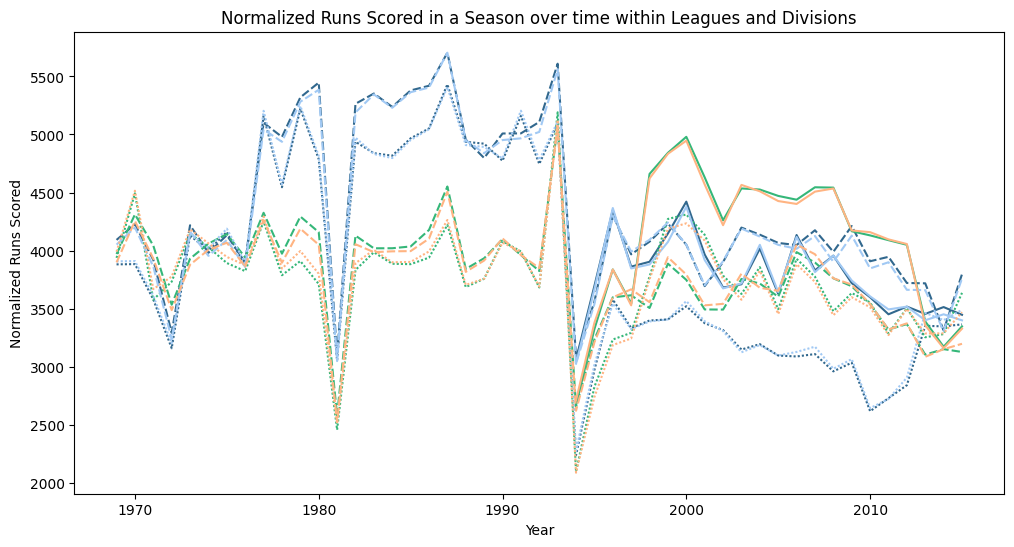

In [77]:
plt.figure(figsize=(12,6))
sns.lineplot(x='yearID', y='normalized_scored', hue='lgID', style='divID', data=bpf_ppf, palette='viridis')
sns.lineplot(x='yearID', y='R', hue='lgID', style='divID', data=bpf_ppf, palette='pastel')
plt.xlabel('Year')
plt.ylabel('Normalized Runs Scored')
plt.title('Normalized Runs Scored in a Season over time within Leagues and Divisions')
plt.legend().remove()
plt.show()

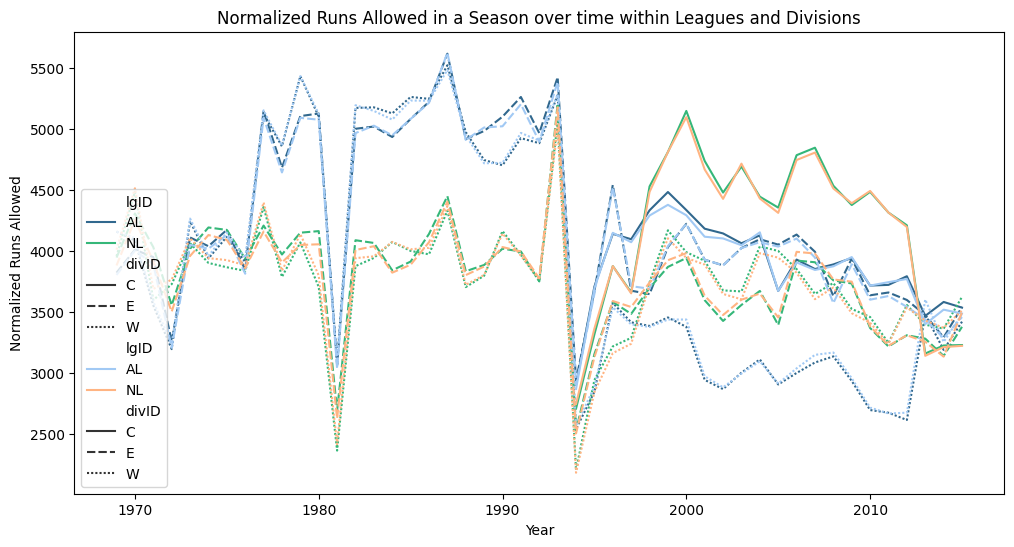

In [78]:
plt.figure(figsize=(12,6))
sns.lineplot(x='yearID', y='normalized_allowed', hue='lgID', style='divID', data=bpf_ppf, palette='viridis')
sns.lineplot(x='yearID', y='RA', hue='lgID', style='divID', data=bpf_ppf, palette='pastel')
plt.xlabel('Year')
plt.ylabel('Normalized Runs Allowed')
plt.title('Normalized Runs Allowed in a Season over time within Leagues and Divisions')
plt.show()

### Are there any imbalances between leagues and divisions for who qualifies for playoffs?

In [39]:
qual_imbalance = teams.groupby(['lgID', 'divID'])
qual = qual_imbalance.agg({
    'teamID': 'count',
    'DivWin': lambda x: x.eq('Y').sum(),
    'WSWin': lambda x: x.eq('Y').sum(),
    'LgWin': lambda x: x.eq('Y').sum(),
})

qual['div_%'] = (qual['DivWin'] / qual['teamID']) * 100
qual['ws_%'] = (qual['WSWin'] / qual['teamID']) * 100
qual['lg_%'] = (qual['LgWin'] / qual['teamID']) * 100

qual

teamID  DivWin  WSWin  LgWin      div_%      ws_%      lg_%
lgID divID                                                             
AL   C         110      21      2      7  19.090909  1.818182  6.363636
     E         277      47     15     26  16.967509  5.415162  9.386282
     W         258      47      8     13  18.217054  3.100775  5.038760
NL   C         125      21      2      5  16.800000  1.600000  4.000000
     E         261      47     10     20  18.007663  3.831418  7.662835
     W         257      47      9     21  18.287938  3.501946  8.171206

In [40]:
qual_by_div = qual.reset_index()

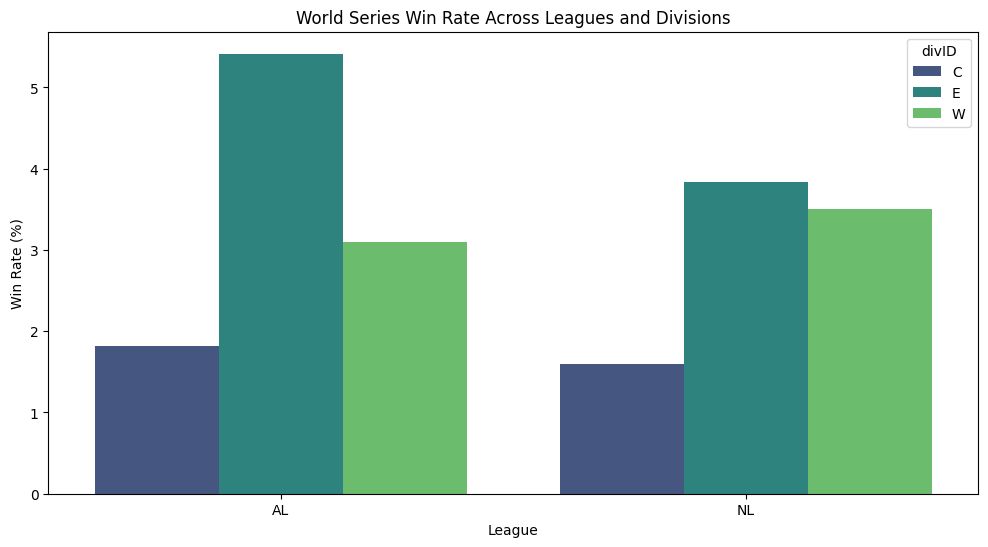

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x='lgID', y='ws_%', hue='divID', data=qual_by_div, palette='viridis')
plt.xlabel('League')
plt.ylabel('Win Rate (%)')
plt.title('World Series Win Rate Across Leagues and Divisions')
plt.show()

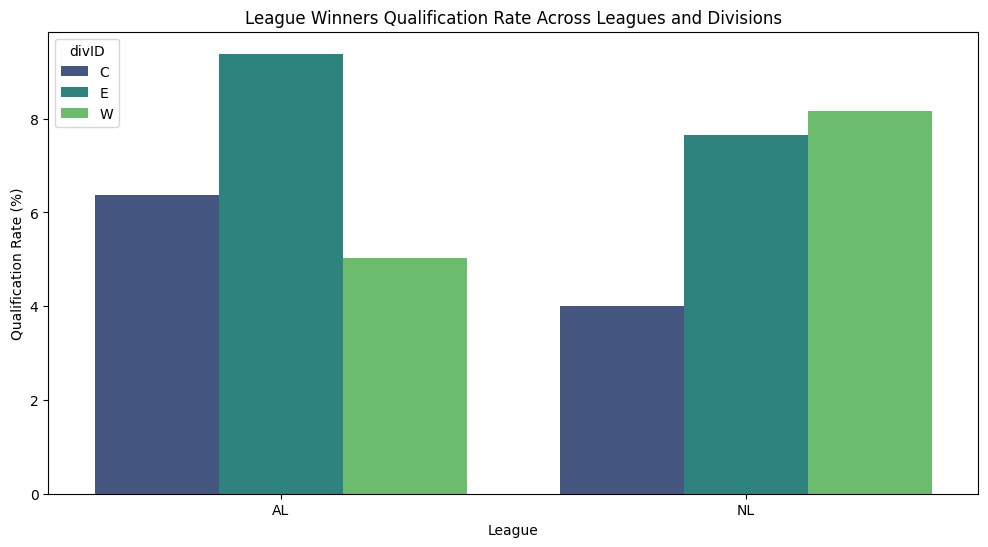

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='lgID', y='lg_%', hue='divID', data=qual_by_div, palette='viridis')
plt.xlabel('League')
plt.ylabel('Qualification Rate (%)')
plt.title('League Winners Qualification Rate Across Leagues and Divisions')
plt.show()

In [43]:
qual

teamID  DivWin  WSWin  LgWin      div_%      ws_%      lg_%
lgID divID                                                             
AL   C         110      21      2      7  19.090909  1.818182  6.363636
     E         277      47     15     26  16.967509  5.415162  9.386282
     W         258      47      8     13  18.217054  3.100775  5.038760
NL   C         125      21      2      5  16.800000  1.600000  4.000000
     E         261      47     10     20  18.007663  3.831418  7.662835
     W         257      47      9     21  18.287938  3.501946  8.171206

Conclusions:

There is a relatively balanced distribution of teams winning their division, suggesting there is no one division that is historically stronger than others.

The most interesting conclusion we can draw from this data is the League Winners and World Series winners. The Eastern division wins the Atlantic League 9.4% of the time, compared to 6.4% for the Central div and 5% for the West.

The National League is primarily dominated by the West and East division (8.2% and 7.7% respectively).

In any given year, there is a 5.4% chance that the World Series winners will be a team from the East division of the American League (Baltimore Orioles, Boston Red Sox, New York Yankees, Tampa Bay Rays, Toronto Blue Jays) 

# Is there a correlation between attendance and team performance?

In [44]:
attendance = teams[['yearID', 'lgID', 'teamID', 'divID', 'Rank', 'W', 'G', 'attendance']]

attendance = attendance[attendance['attendance'] >= 0]

In [45]:
attendance_corr = attendance['attendance'].corr(attendance['W'] / attendance['G'])
attendance_corr

0.2714063274376522

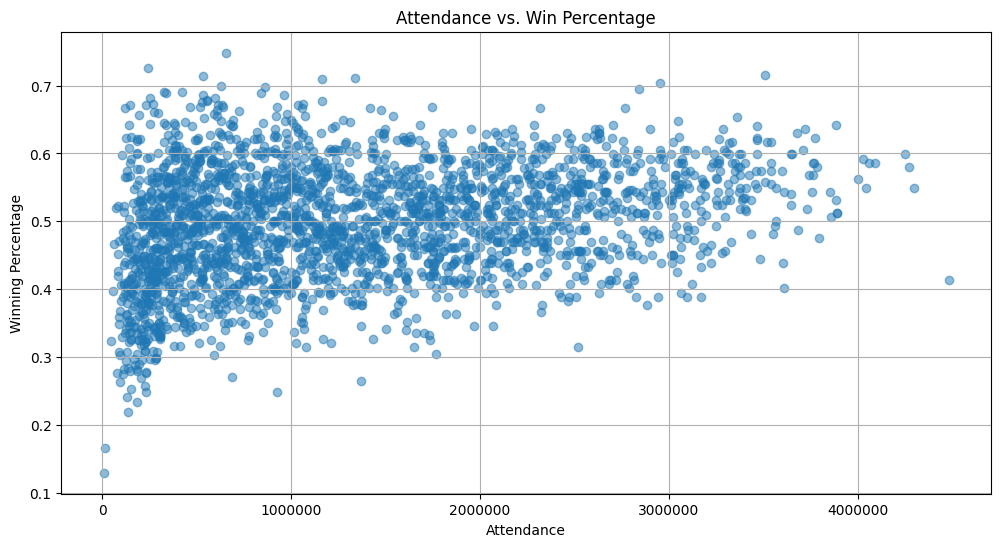

In [46]:
plt.figure(figsize=(12,6))
plt.scatter(attendance['attendance'], attendance['W'] / attendance['G'], alpha=0.5)
plt.title('Attendance vs. Win Percentage')
plt.xlabel('Attendance')
plt.ylabel('Winning Percentage')
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.show()

Weak positive correlation --> On average, as winning increases, so does attendance ever so slightly, but winning is not everything.

In [47]:
rank_corr = attendance['attendance'].corr(attendance['Rank'])
rank_corr

-0.46584088785656874

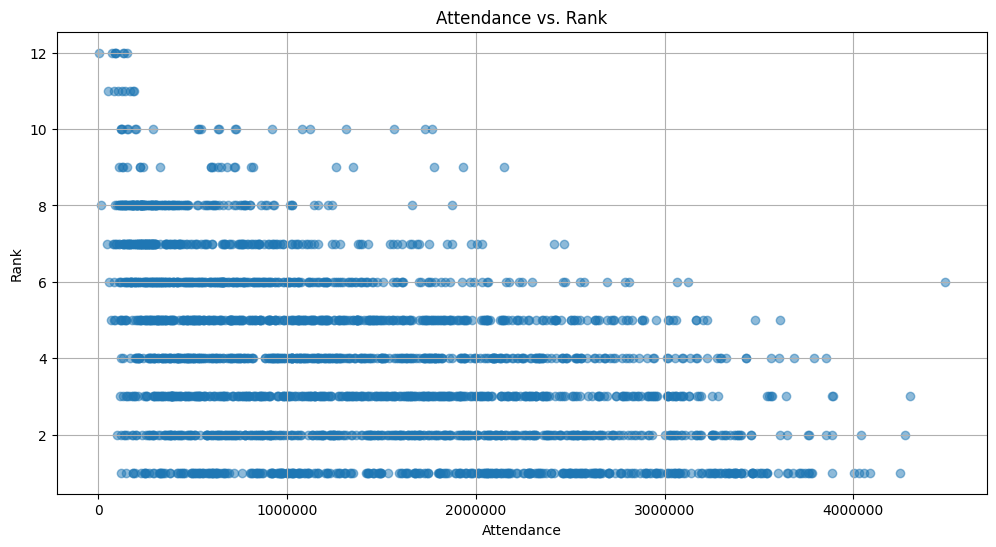

In [48]:
plt.figure(figsize=(12,6))
plt.scatter(attendance['attendance'], attendance['Rank'], alpha=0.5)
plt.title('Attendance vs. Rank')
plt.xlabel('Attendance')
plt.ylabel('Rank')
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.show()

Moderate negative correlation --> As teams climb in the standings (numbers get lower), attendence tends to increase. This is likely due to the team winning drawing more interest from the general population.

Outliers in this data and overall attendance could be from other factors as well, including a team's overall popularity, market size, stadium capacity, and historical performance. 

# Can we predict a team's playoff success based on regular season performance?

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
success_metrics = ['DivWin', 'LgWin', 'WCWin', 'WSWin']
features = ['W', 'L', 'R', 'RA', 'ERA', 'FP']

In [51]:
teams_clean = teams[features + success_metrics].fillna(0)
teams_clean[features] = teams_clean[features].astype(float)
teams_clean[success_metrics] = teams_clean[success_metrics].replace({'Y': 1, 'N': 0})

C:\Users\Matthew\AppData\Local\Temp\ipykernel_22812\3698967359.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  teams_clean[success_metrics] = teams_clean[success_metrics].replace({'Y': 1, 'N': 0})


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    teams_clean[features],
    teams_clean[success_metrics],
    test_size=0.2,
    random_state=42
)

model = LogisticRegression(max_iter=1000)

In [53]:
model.fit(X_train, y_train['DivWin'])

LogisticRegression(max_iter=1000)

In [54]:
accuracy = model.score(X_test, y_test['DivWin'])
accuracy

0.9447415329768271

In [55]:
feature_importance = dict(zip(features, model.coef_[0]))
feature_importance

{'W': 0.2780977939091808,
 'L': 0.07810868657866278,
 'R': -0.005081585063060787,
 'RA': -0.021426759213110765,
 'ERA': 4.165204059114135,
 'FP': 0.6495091666524133}

I can test the model by taking actual stats from years out of bounds of the dataset to see how well it performs and can predict the values.

In [56]:
giants_2021 = pd.DataFrame([[107, 55, 804, 594, 3.24, 0.986]], columns=features) # Won the NL West in 2021
yankees_2022 = pd.DataFrame([[99, 63, 807, 567, 3.30, 0.987]], columns=features) # Won the AL East in 2022
athletics_2018 = pd.DataFrame([[96, 65, 813, 674, 3.81, 0.985]], columns=features) # 2nd in the AL West in 2018

In [57]:
model.predict(giants_2021)

array([1], dtype=int64)

In [58]:
model.predict(yankees_2022)

array([1], dtype=int64)

In [59]:
model.predict(athletics_2018)

array([0], dtype=int64)

All three of these predictions are correct, validating our model's accuracy. Based on the feature importance, we can see that winning percentage, fielding percentage, and pitching performance (ERA, Runs Allowed) are the most predictive factors of a team's playoff success based on regular season performance.

# How have park factors influenced team performance over time?

Park factors (batting park factor and pitching park factor) are the three-year averages that compare the rate of stats at home vs. the rate of stats when the team is on the road. If the park factor is higher than 100, then that means that hitters/pitchers perform better at home.

In [65]:
teams['BA'] = teams['H'] / teams['AB']
pf_df = teams.copy()
pf_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,team_BA,BA
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,0.310496,0.310496
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,0.270067,0.270067
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,0.276560,0.276560
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,0.238606,0.238606
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,0.287037,0.287037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN,0.249954,0.249954
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN,0.267026,0.267026
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI,0.264472,0.264472
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN,0.242624,0.242624


In [ ]:
performance_metrics = ['R', 'RA', 'BA', 'ERA']

for metric in performance_metrics:
    pf_df[f'{metric}_adjusted'] = pf_df[metric] * (pf_df['BPF'] / 100)

In [67]:
pf_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,team_BA,BA,R_adjusted,RA_adjusted,BA_adjusted,ERA_adjusted
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,98,BOS,BS1,BS1,0.310496,0.310496,413.03,312.09,0.319810,3.6565
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,102,CHI,CH1,CH1,0.270067,0.270067,314.08,250.64,0.280870,2.8704
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,100,CLE,CL1,CL1,0.276560,0.276560,239.04,327.36,0.265497,3.9456
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,107,KEK,FW1,FW1,0.238606,0.238606,138.37,245.43,0.240992,5.2217
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,88,NYU,NY2,NY2,0.287037,0.287037,271.80,281.70,0.258333,3.3480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,98,LAD,LAN,LAN,0.249954,0.249954,673.67,600.95,0.252453,3.4744
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,97,SFG,SFN,SFN,0.267026,0.267026,689.04,620.73,0.264356,3.6828
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,106,ARI,ARI,ARI,0.264472,0.264472,770.40,762.91,0.282985,4.3228
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,97,SDP,SDN,SDN,0.242624,0.242624,637.00,716.38,0.237772,4.0082


In [68]:
year_metrics = pf_df.groupby('yearID')[['R', 'RA', 'BA', 'ERA', 'R_adjusted', 'RA_adjusted', 'BA_adjusted', 'ERA_adjusted']].mean()
year_metrics

,R,RA,BA,ERA,R_adjusted,RA_adjusted,BA_adjusted,ERA_adjusted
yearID,,,,,,,,
1871,295.444444,295.444444,0.283573,4.271111,292.202222,290.818889,0.279979,4.215011
1872,308.181818,308.181818,0.276286,4.388182,314.032727,314.384545,0.282270,4.526927
1873,397.777778,397.777778,0.270211,3.770000,401.584444,390.594444,0.265590,3.522733
1874,433.625000,433.625000,0.271684,3.056250,446.022500,441.898750,0.278411,3.113563
1875,325.692308,325.692308,0.237328,2.826154,328.625385,317.720769,0.232884,2.714754
...,...,...,...,...,...,...,...,...
2011,693.600000,693.600000,0.254940,3.936667,697.686667,694.767000,0.255558,3.944057
2012,700.566667,700.566667,0.254436,4.009333,701.847667,701.647000,0.254567,4.016943
2013,675.166667,675.166667,0.253361,3.863333,676.379333,676.036667,0.253801,3.869147


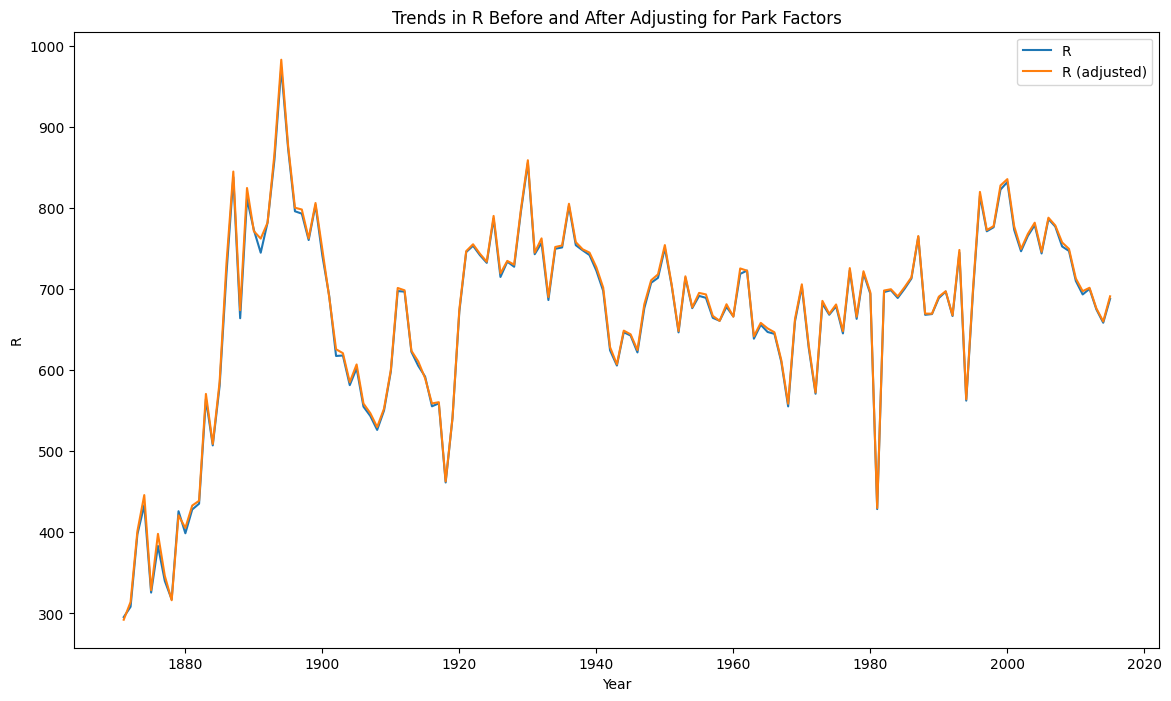

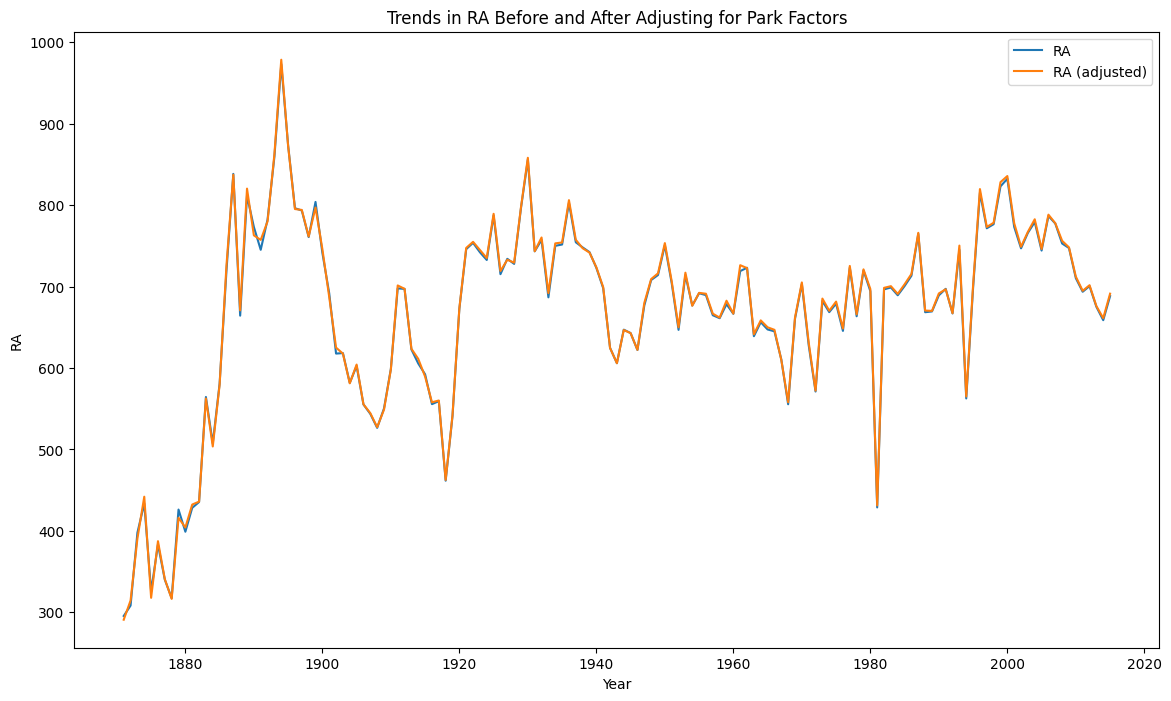

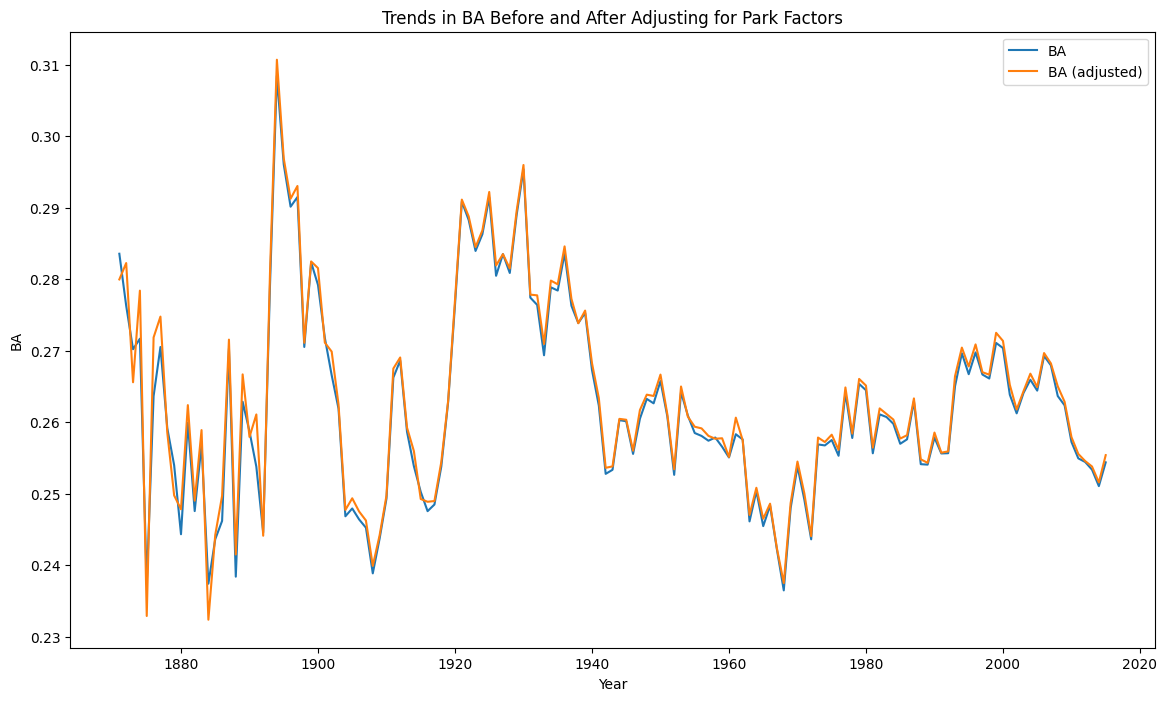

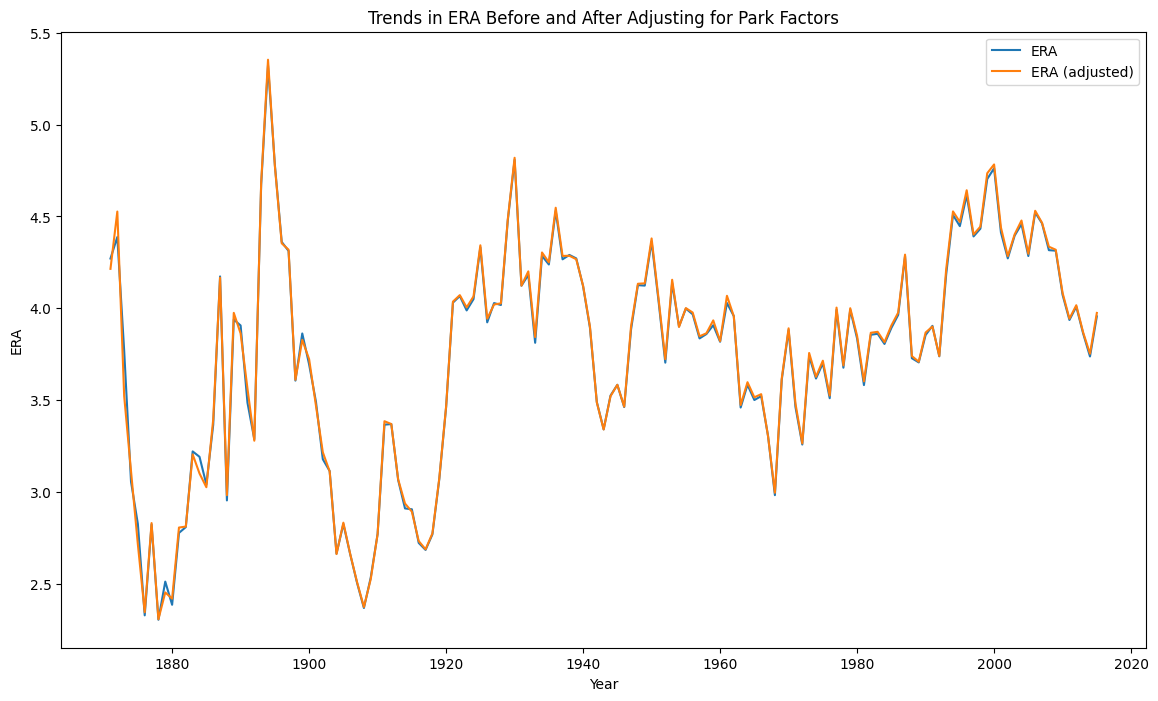

In [69]:
for metric in performance_metrics:
    plt.figure(figsize=(14,8))
    plt.plot(year_metrics.index, year_metrics[metric], label=f'{metric}')
    plt.plot(year_metrics.index, year_metrics[f'{metric}_adjusted'], label=f'{metric} (adjusted)')
    plt.xlabel('Year')
    plt.ylabel(f'{metric}')
    plt.title(f'Trends in {metric} Before and After Adjusting for Park Factors')
    plt.legend(loc='best')
    plt.show()

The most noticable change in performance is from the Batting Average graph. After adjusting for park factors, there is a slight increase in batting average, meaning that batters typically perform better at home versus on the road. None of the other performance metrics show any measurable and significant increases in team performance.